In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

# <font color=blue> Housing Price Prediction in Ontario </font>

Limited housing supply and strong demand will likely keep the Ontario housing market in strong seller’s territory through 2022. Houses sold over the asking price has become a serious problem in Ontario. In today’s market, an asking/list price and a sold price are two entirely different things. Houses are sold within days of listing, and buyers often bid aggressively while stretching their credit limit. It has become essential to develop a model which can predict the housing price and thereby potential buyers can offer a resonable price.

This notebook aims at exploring Housing Price in Ontario through data analysis and projections.

# <font color=blue> Data Unserstanding </font>

## Data Collection

I gathered the data by web-scraping a real estate website for listings that were sold recently in all major cities of Ontario.  In order to avoid any confidentiality issues, I have decided not to share the details of how I scraped the data and the data that I scraped. But it helps to see the structure of data that I gathered, so here is a small sample of it:

In [2]:
data = pd.read_csv('Housing_Data.csv')


## Data Cleaning

We will select "City", "Neighbourhood", "Type", "Bedrooms", "Bathrooms", "Sqft", "Parking",	"Taxes", "Maintenance Fee", "Exterior",	"Basement",	"Garage", "Age"	, "Heating Fuel", "Levels"  as the features/ attributes of our model. We will not consider list price in out prediction analysis as it completely depends on the seller.

Lets remove the first column (Unnamed) as it is not needed for our analysis.

In [3]:
data.drop(columns=data.columns[0], axis=1, inplace=True)

In [4]:
def no_of_entries_plot():
    no_of_entries = data.describe(include="all").iloc[0, :].to_frame()
    no_of_entries.rename(columns={"count":"No of Entries"}, inplace= True)
    print(no_of_entries)

    no_of_entries.plot(kind = 'bar', figsize =(20,6), color='#5cb75c')
    plt.title('No of entries in each column', fontsize =14)
    plt.ylabel('No of Entries', fontsize=14)
    plt.show()
    


                No of Entries
Full Link                1500
Image                    1500
City                     1500
Neighbourhood            1490
Address                  1500
Type                     1500
Sold price             1495.0
List price             1500.0
Bedrooms               1500.0
Bathrooms              1500.0
Sqft                   1005.0
Parking                1500.0
Taxes                    1480
Maintenance Fee         430.0
Exterior                 1495
Basement                 1500
Garage                   1500
Age                       855
Heating Fuel             1500
Levels                   1500


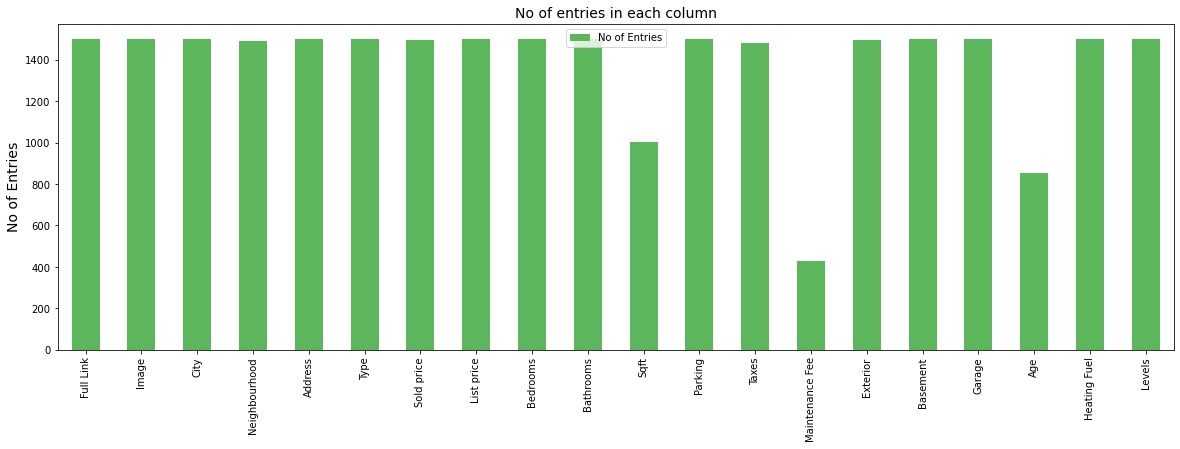

In [5]:
no_of_entries_plot()    

## Identify and handle missing values

From the Dataframe, we can see that some columns contain blank/NaN values, we will first delete columns "Maintenance Fee" and "Sqft" as these are not that much important and then all the rows which contain any null entry. We will create a csv file from this dataframe for the web app and also for exploratory data analysis.

In [6]:
data.drop(["Maintenance Fee", "Sqft"], axis=1, inplace=True )
data.dropna(inplace = True)

In [7]:
data.to_csv("Housing_Data_Clean.csv")

We can drop the Full Link, Image, Address columns as these are not needed for data analysis.

In [8]:
data.drop(["Full Link", "Image", "Address"], axis=1, inplace=True )
print(data.shape)
data.head()

(830, 15)


,City,Neighbourhood,Type,Sold price,List price,Bedrooms,Bathrooms,Parking,Taxes,Exterior,Basement,Garage,Age,Heating Fuel,Levels
1,Toronto,Graydon,Condo Apt,673000.0,549900,1,1,1.0,1814.7,Concrete,None,Undergrnd,0-5,Gas,Apartment
3,Toronto,Mimico,Condo Apt,650000.0,599900,1,1,1.0,1539.75,Concrete,None,Undergrnd,6-10,Gas,Apartment
7,Toronto,Railway Lands,Condo Apt,940000.0,799900,2,2,1.0,3018.41,Brick,None,Undergrnd,11-15,Gas,Apartment
12,Toronto,Alderwood,Condo Townhouse,1098000.0,1098000,2,3,1.0,2945.08,Brick,None,Undergrnd,0-5,Gas,Stacked Townhse
18,Toronto,Clairlea,Detached,1775000.0,1499900,4,4,4.0,4979.75,Brick,Apartment and Sep Entrance,Attached,0-5,Gas,2-Storey


## <font color=blue>Exploratory Data Analysis </font>
Now we have only 255 data left as we removed all the null entries. We can perform some analysis on this data. First we will see what are the different categories in each column.

########### City ##########
               City
Milton          115
Burlington      110
Oakville        100
Hamilton        100
London           90
Toronto          75
Brampton         60
Markham          60
Oshawa           40
Whitby           40
Mississauga      35
Richmond Hill     5


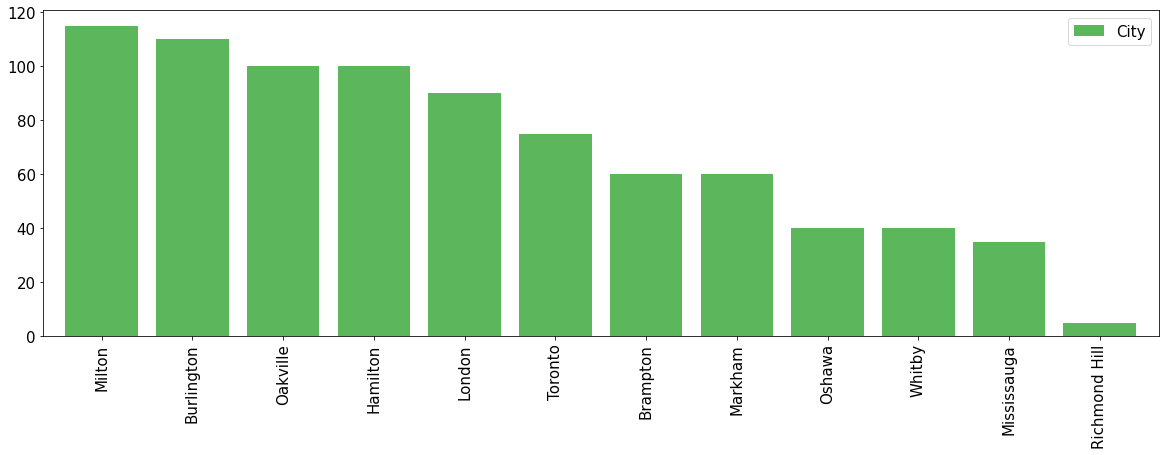

########### Type ##########
                    Type
Detached             405
Condo Apt            170
Att/Row/Twnhouse     110
Condo Townhouse       85
Semi-Detached         40
Link                   5
Det Condo              5
Comm Element Condo     5
Duplex                 5


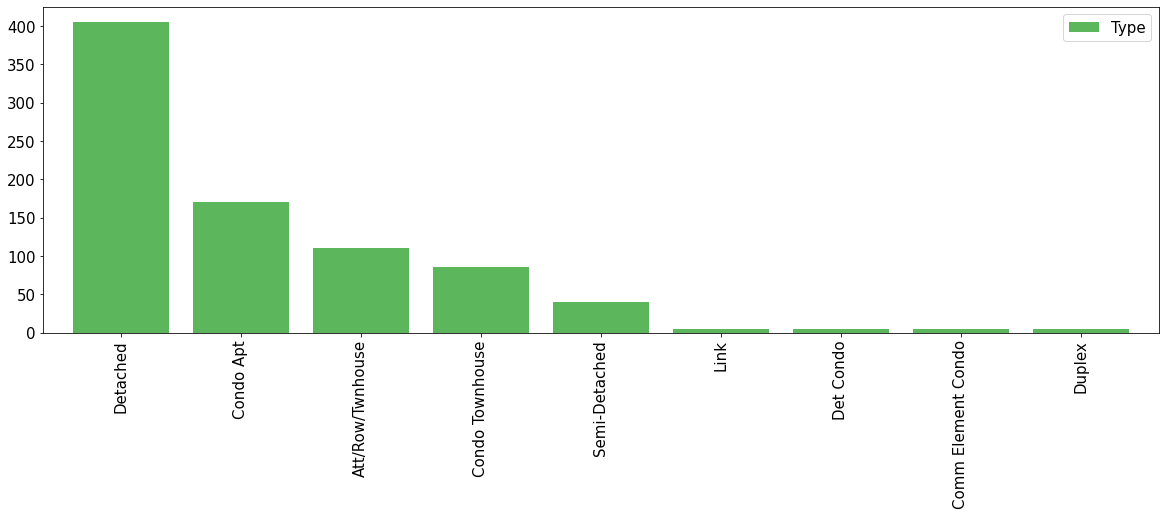

########### Bedrooms ##########
   Bedrooms
3       370
4       190
2       165
1        85
5        15
0         5


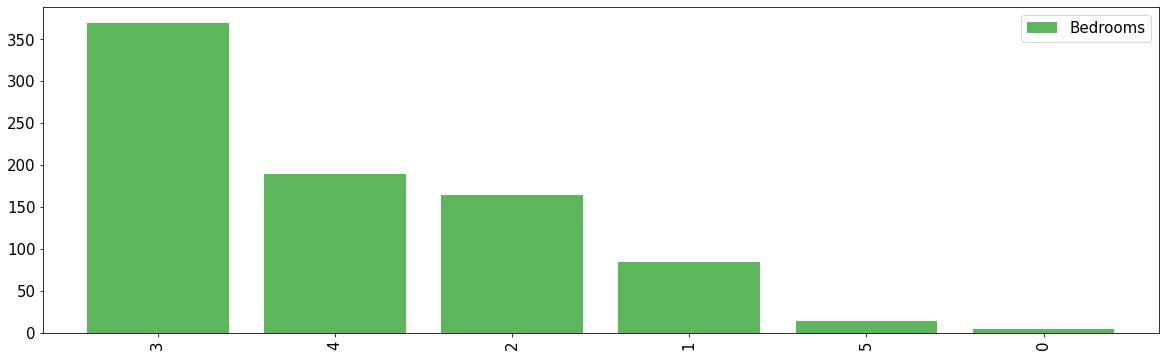

########### Bathrooms ##########
   Bathrooms
3        285
2        235
4        155
1        115
5         30
6          5
7          5


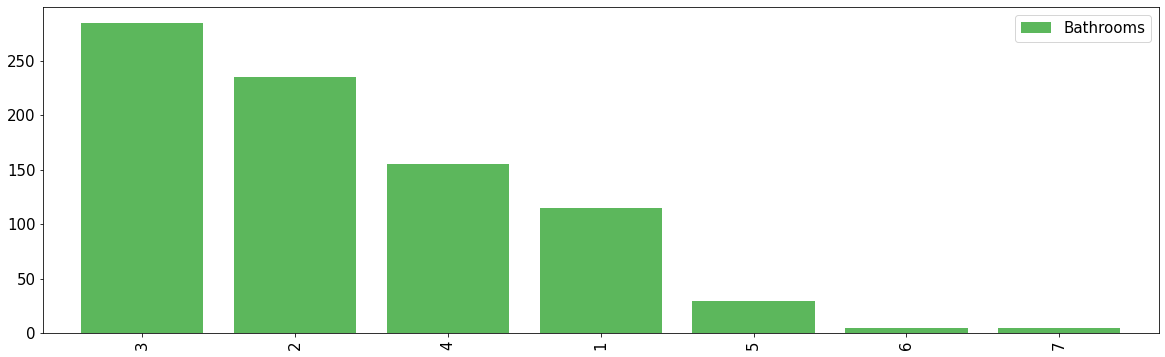

########### Parking ##########
      Parking
4.0       180
3.0       175
1.0       170
2.0       165
6.0        60
5.0        40
8.0        10
9.0        10
4.5         5
10.0        5
0.0         5
12.0        5


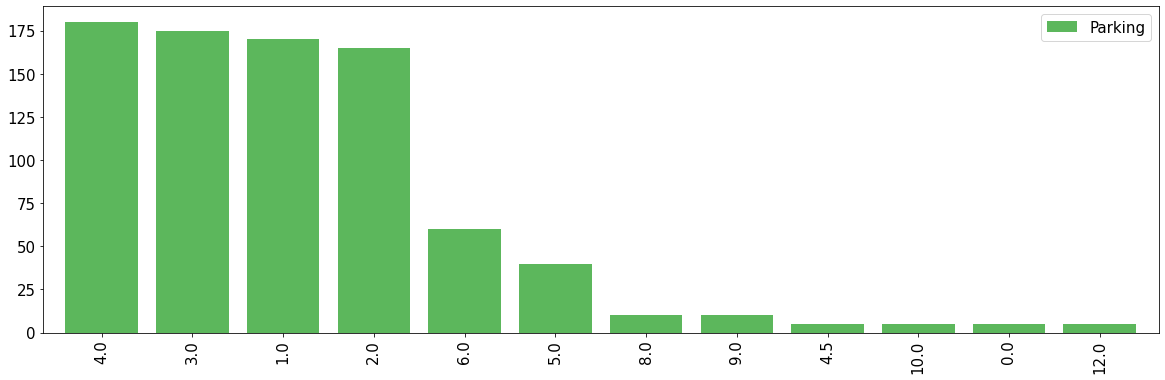

########### Exterior ##########
                                 Exterior
Brick                                 355
Brick and Vinyl Siding                120
Concrete                               60
Brick and Stucco/Plaster               60
Brick and Stone                        40
Alum Siding and Brick                  20
Brick and Concrete                     20
Vinyl Siding                           20
Stucco/Plaster                         15
Brick and Metal/Side                   10
Brick Front and Vinyl Siding           10
Stone and Brick                        10
Vinyl Siding and Brick                 10
Concrete and Other                      5
Brick and Wood                          5
Stone and Vinyl Siding                  5
Brick Front                             5
Stucco/Plaster and Vinyl Siding         5
Alum Siding and Concrete                5
Alum Siding and Stone                   5
Brick and Shingle                       5
Stone                                   5
Wo

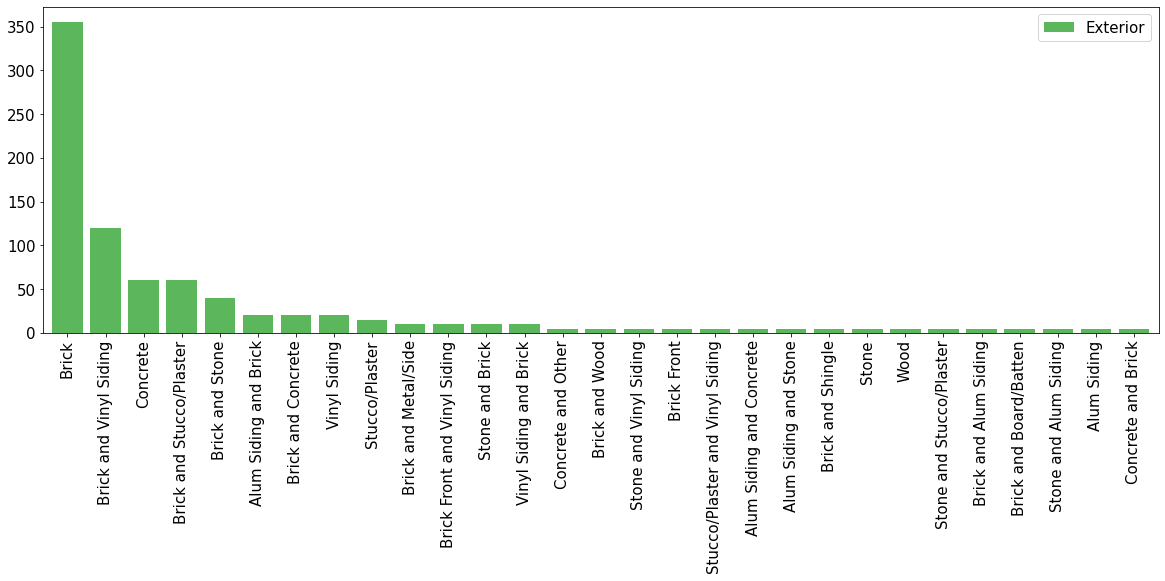

########### Basement ##########
                            Basement
None                             220
Finished and Full                125
Finished                          90
Finished and Sep Entrance         65
Full and Unfinished               60
Unfinished                        40
Fin W/O                           30
Full and Finished                 20
Part Fin                          20
Full                              20
Other                             15
Apartment and Sep Entrance        15
Full and Part Fin                 15
Apartment and Finished            10
Part Fin and Sep Entrance         10
Unfinished and Full               10
Crawl Space and Unfinished         5
Full and Half                      5
Part Bsmt and Unfinished           5
Finished and Walk-Up               5
Half and Walk-Up                   5
Crawl Space and Half               5
Fin W/O and Sep Entrance           5
Crawl Space and Full               5
Full and Sep Entrance              5
Finish

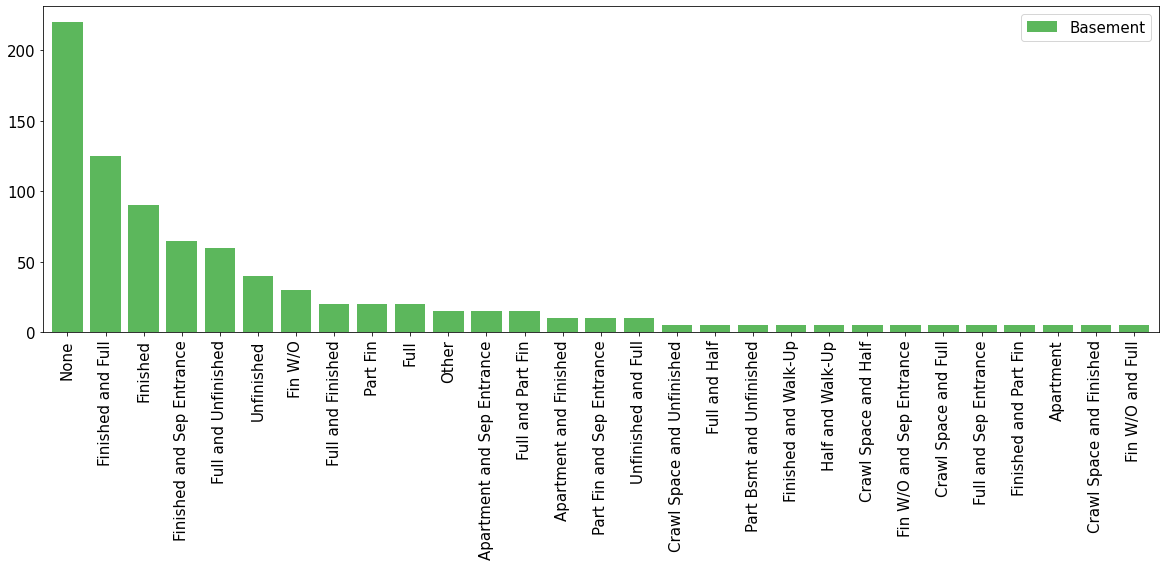

########### Garage ##########
           Garage
Attached      340
Undergrnd     185
Built-In      130
None          110
Detached       55
Carport        10


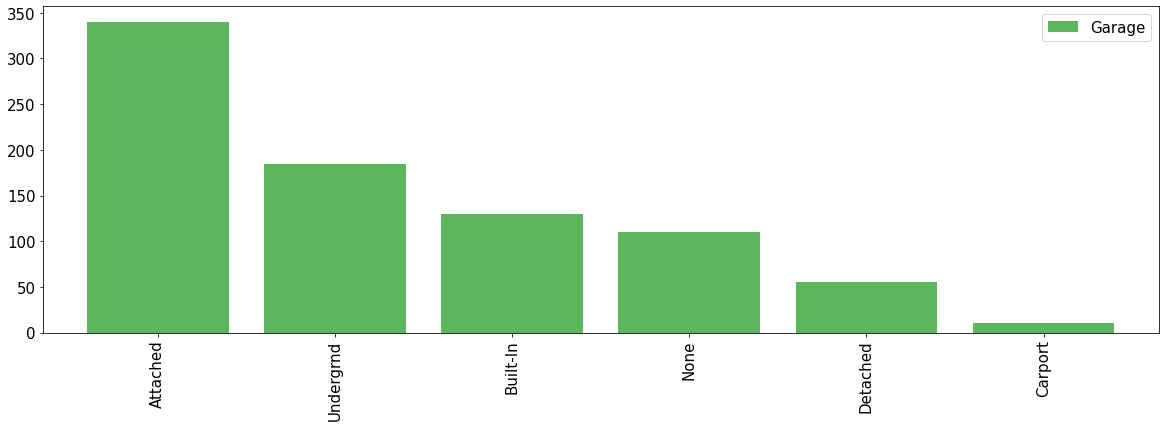

########### Age ##########
             Age
0-5          165
51-99        150
6-15         150
16-30        130
31-50        115
6-10          45
11-15         35
100+          15
New           10
31-50 Years   10
6-15 Years     5


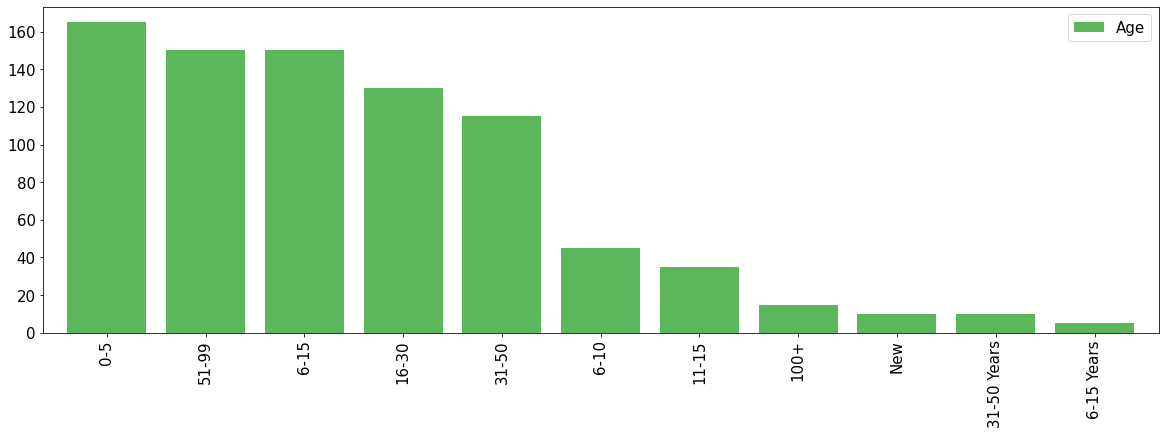

########### Heating Fuel ##########
           Heating Fuel
Gas                 790
Electric             30
Other                 5
Grnd Srce             5


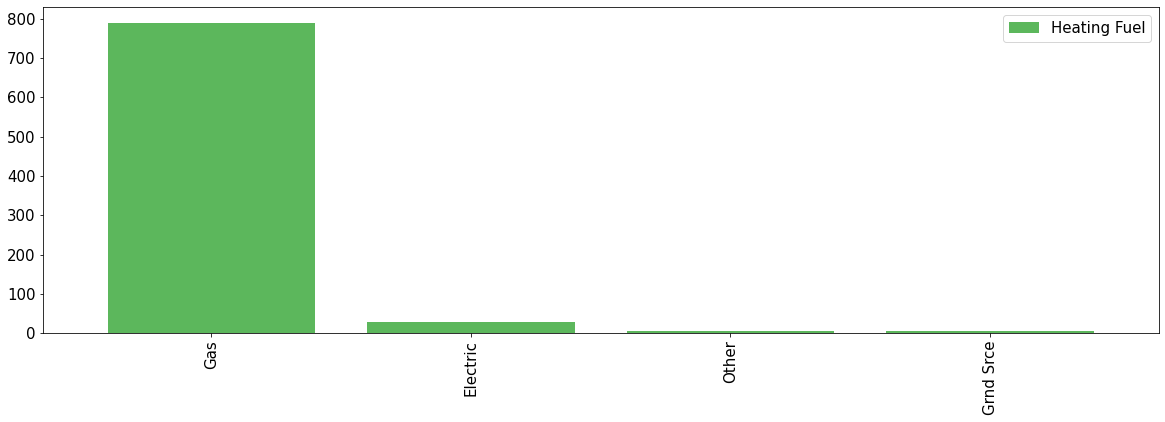

########### Levels ##########
                 Levels
2-Storey            370
Apartment           170
Bungalow             85
3-Storey             80
1 1/2 Storey         40
Stacked Townhse      20
Backsplit 3          20
Backsplit 4          10
Sidesplit 3          10
Loft                  5
Sidesplit 4           5
2 1/2 Storey          5
Multi-Level           5
Bungalow-Raised       5


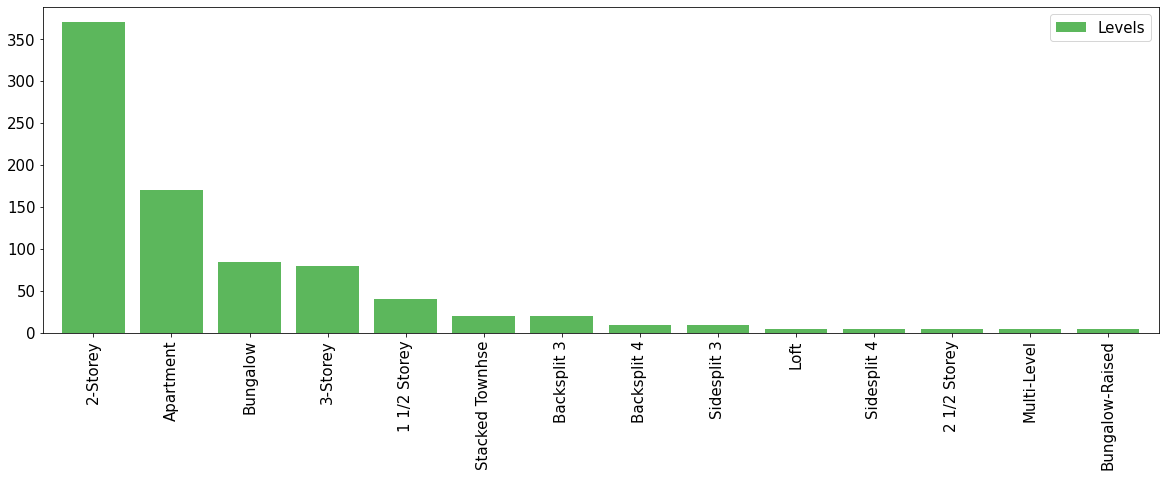

In [9]:
for i in range(len(data.columns)):
    if i!= 1 and i!=8 and i!=3 and i!=4:  # We will exclude list Prices/ Sold Prices/ Taxes
        print('###########',data.columns[i], '##########')
        groups=data.iloc[:, i].value_counts().to_frame()
        print(groups)
        plt.rcParams.update({'font.size':15})
        groups.plot(kind='bar',figsize=(20, 6), width=0.8, color='#5cb75c')
        plt.show()
        

### Density plot of Sold price
 We will now take a look at the sold price in each city of Ontario.

In [10]:
cities = data['City'].value_counts().transpose().to_frame()
print(cities.index)

Index(['Milton', 'Burlington', 'Oakville', 'Hamilton', 'London', 'Toronto',
       'Brampton', 'Markham', 'Oshawa', 'Whitby', 'Mississauga',
       'Richmond Hill'],
      dtype='object')


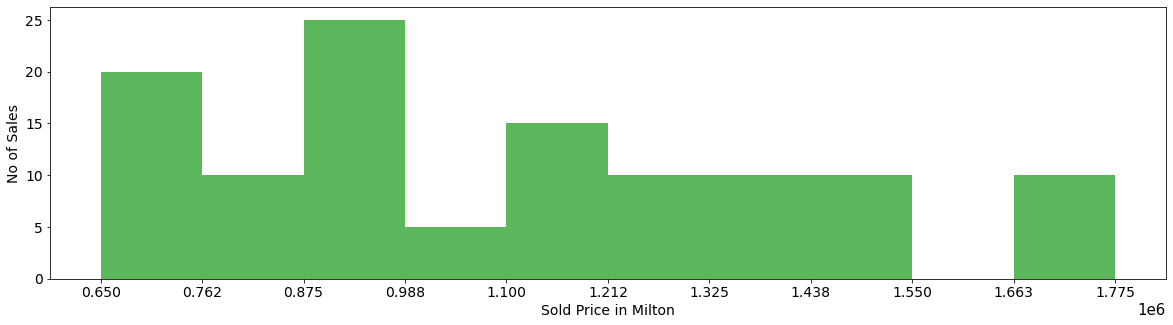

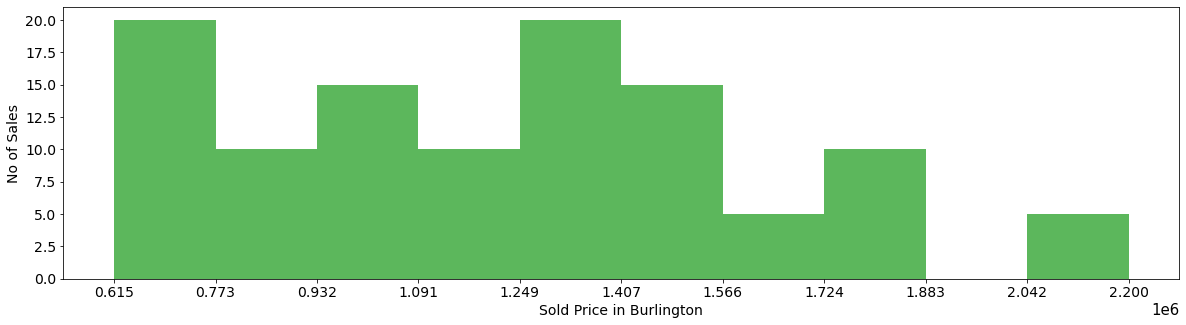

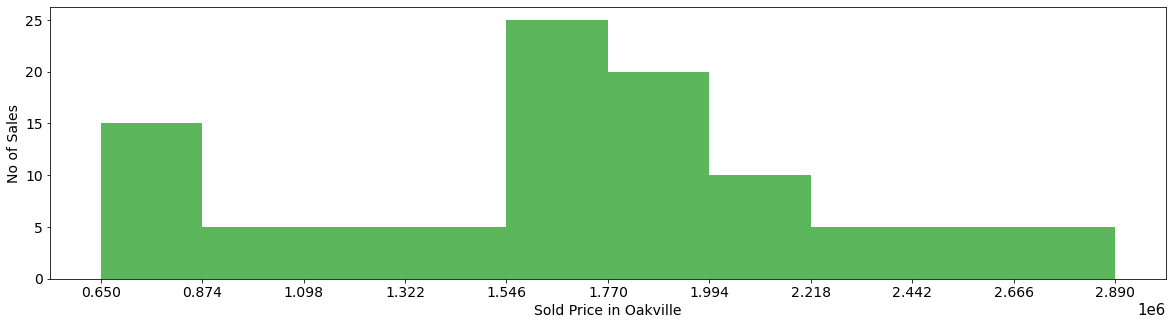

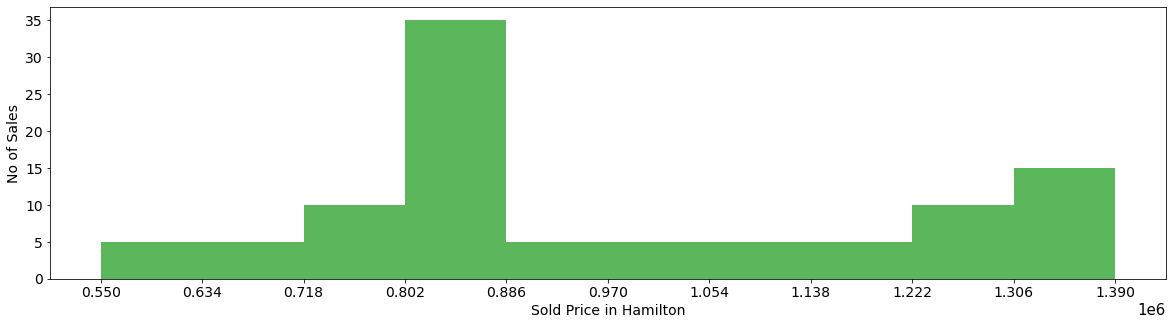

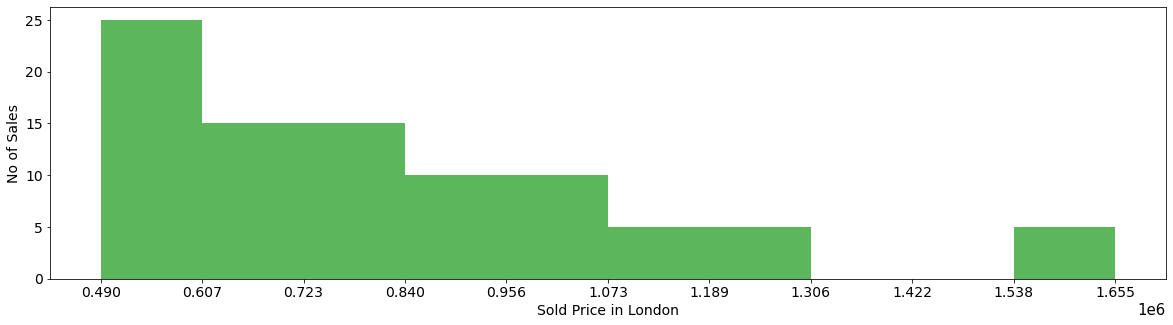

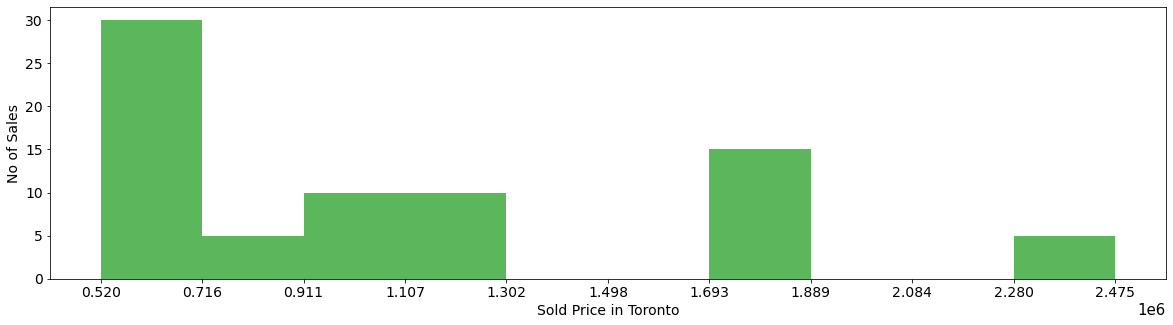

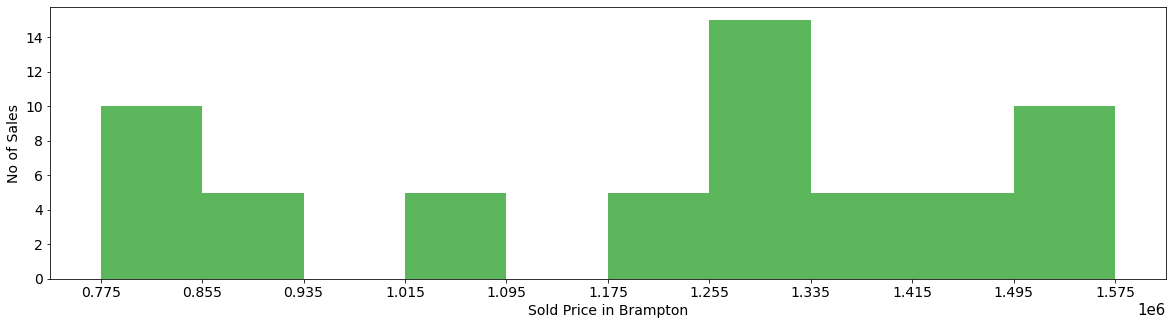

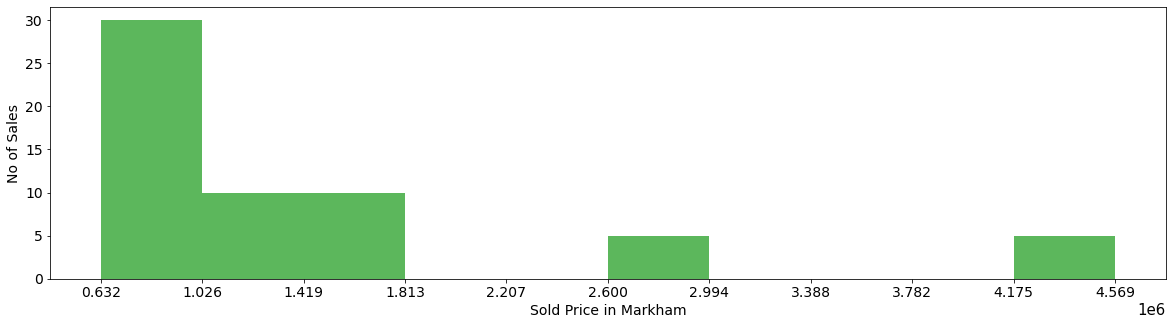

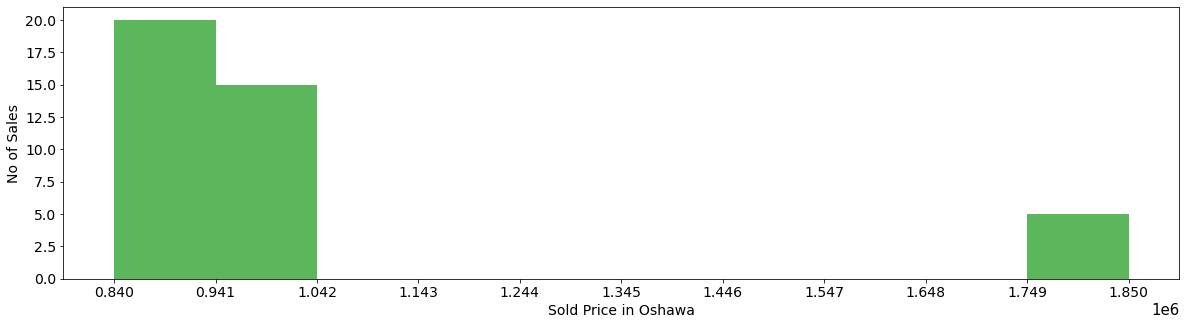

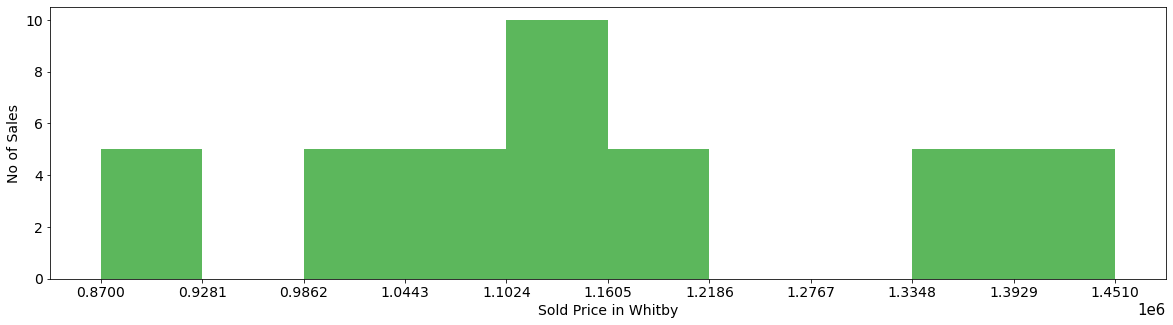

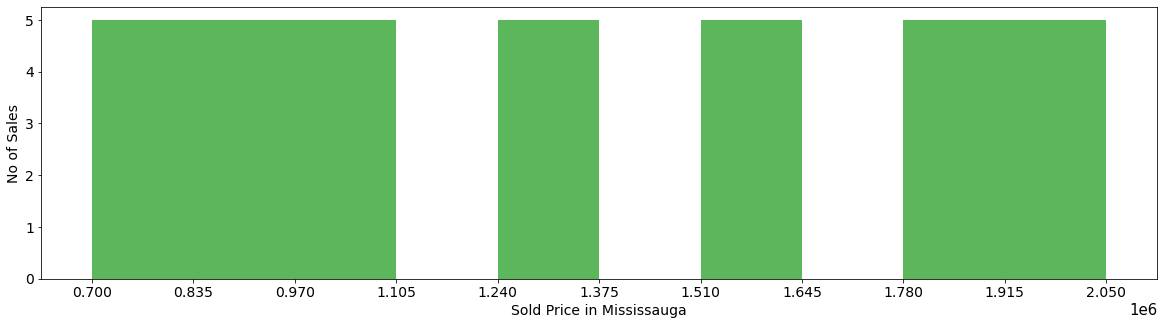

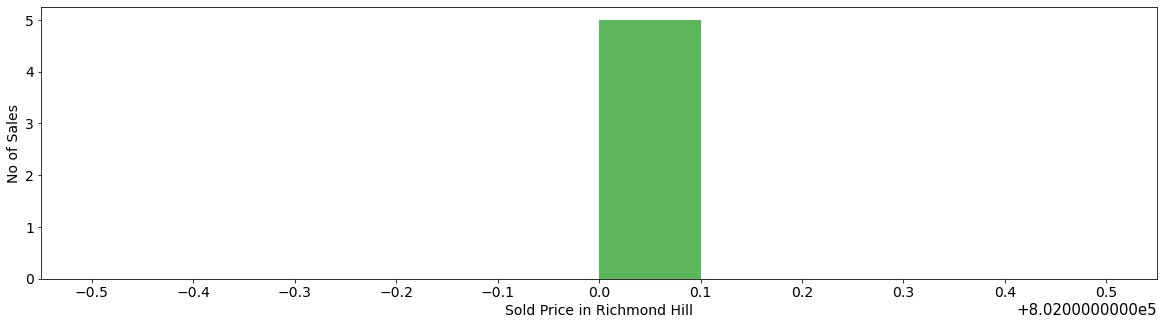

In [11]:
for i in range(len(cities.index)):
    price_city =data.loc[data['City']==cities.index[i],'Sold price']
    c, bin_edges = np.histogram(price_city, bins=10)
    price_city.plot(kind='hist', xticks=bin_edges, figsize=(20, 5), color='#5cb75c')
    plt.ylabel('No of Sales', fontsize = 14)
    plt.xlabel('Sold Price in '+cities.index[i], fontsize = 14)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

